## Import libraries

In [1]:
import os
import time
import torch
from torch import nn
from tqdm.notebook import tqdms
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader
print("Pytorch: {}".format(torch.__version__))

Pytorch: 1.5.0


In [2]:
from yolov3.yolov3 import *
from yolov3.yolov3_tiny import *
from voc_utils import VOCDataset, PlotSample

In [3]:
from dutils import PictureDetection

# Dataset

In [4]:
path = 'dataset/VOC2007'
train_set = VOCDataset(path, input_shape=(320, 320), mode='train', dataset='voc')
train_gen = DataLoader(train_set, batch_size=1, shuffle=False)

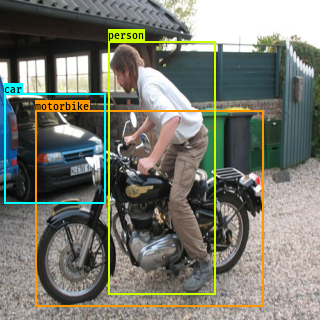

In [5]:
x, y = train_set.__getitem__(47)
PlotSample(x, y, dataset='voc')

# Model

In [6]:
model = Yolov3Tiny(num_classes=len(train_set.classes))
#model.load_backbone('models/yolov3(tiny).h5')

In [ ]:
#model = Yolov3(num_classes=len(train_set.classes))
#model.load_backbone('models/yolov3.h5')

**Сначало можно загрузить backbone натренированный на COCO Dataset а потом дотренить модель на VOC Dataset. При этом следует в поле выше где определяется датасет указать `dataset = 'coco'` для соотнесения индексов. В COCO - 80 классов, а в VOC - 20!**

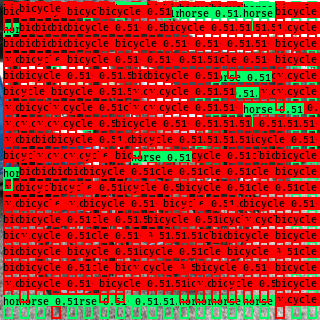

In [7]:
PictureDetection(model, x, size=(320,320), dataset='voc')

## Train Yolov3Tiny on VOC Dataset

In [8]:
def YoloLoss(model, pred, target):
    layers=model.get_loss_layers()
    loss=0.
    for i, layer in enumerate(layers):
        loss += layer.get_loss(pred[i], target, return_single_value=True)
    return loss

In [9]:
def Train(model, criterion, optimizer, train_gen, epochs=5):
    train_losses=[]
    model.train()
    for epoch in tqdm(range(epochs)):
        losses=0.
        for x, y in tqdm(train_gen):
            x = x.to(device)
            y = y.to(device)
            optimizer.zero_grad()
            pred = model(x)
            loss = criterion(model, pred, y)
            loss.backward()
            optimizer.step()
            losses+=loss
        train_losses.append(losses/len(train_gen))
        print('Epoch {}/{} --- Loss: {:.4f}'.format(epoch+1, epochs, train_losses[-1]))
    return train_losses

In [10]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters())

In [13]:
loss = Train(model, YoloLoss, optimizer, train_gen, epochs=20)


Epoch 1/20 --- Loss: 21.2384



Epoch 2/20 --- Loss: 18.5810



Epoch 3/20 --- Loss: 17.8580



Epoch 4/20 --- Loss: 17.1053



Epoch 5/20 --- Loss: 16.2801



Epoch 6/20 --- Loss: 15.2742



Epoch 7/20 --- Loss: 14.0466



Epoch 8/20 --- Loss: 12.4175



Epoch 9/20 --- Loss: 10.5138



Epoch 10/20 --- Loss: 8.9232



Epoch 11/20 --- Loss: 7.8279



Epoch 12/20 --- Loss: 7.1441



Epoch 13/20 --- Loss: 6.5088



Epoch 14/20 --- Loss: 6.2544



Epoch 15/20 --- Loss: 5.8755



Epoch 16/20 --- Loss: 5.5379



Epoch 17/20 --- Loss: 5.3013



Epoch 18/20 --- Loss: 5.1098



Epoch 19/20 --- Loss: 4.7990



Epoch 20/20 --- Loss: 4.5350



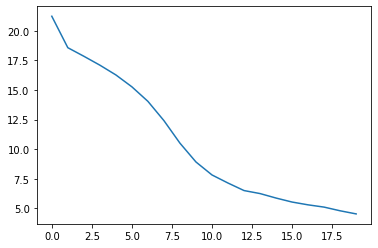

In [14]:
plt.plot(loss)

In [15]:
#torch.save(model, 'yolov3(tiny[voc]).h5')